In [1]:
import pandas as pd 
import seaborn as sns
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# Check for which parameter set the number of segments and the Gini impurity are balanced 

## Coarse resolution parameter set

### Load and normalize the data

In [113]:
dir = Path("/DATA/Luis/thesis/scanline_classification/data/gini_impurity/scanline_subsampling/gini_impurity_stats/gini_impurity_stats.csv")
df = pd.read_csv(dir)

df["number_segments_normalized"] = (df["number_segments"] - df["number_segments"].min()) / (df["number_segments"].max() - df["number_segments"].min())
df["impurity_mean_normalized"] = (df["impurity_mean"] - df["impurity_mean"].min()) / (df["impurity_mean"].max() - df["impurity_mean"].min())
df["number_segments_low_points5_normalized"] = (df["number_segments_low_points5"] - df["number_segments_low_points5"].min()) / (df["number_segments_low_points5"].max() - df["number_segments_low_points5"].min())

### Sort the values by Gini impurity measure

In [133]:
# sort df the by the number of segments
#df_sorted = df.sort_values(by="number_segments")
df_sorted = df.sort_values(by="impurity_mean")

/tmp/ipykernel_802320/523199378.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


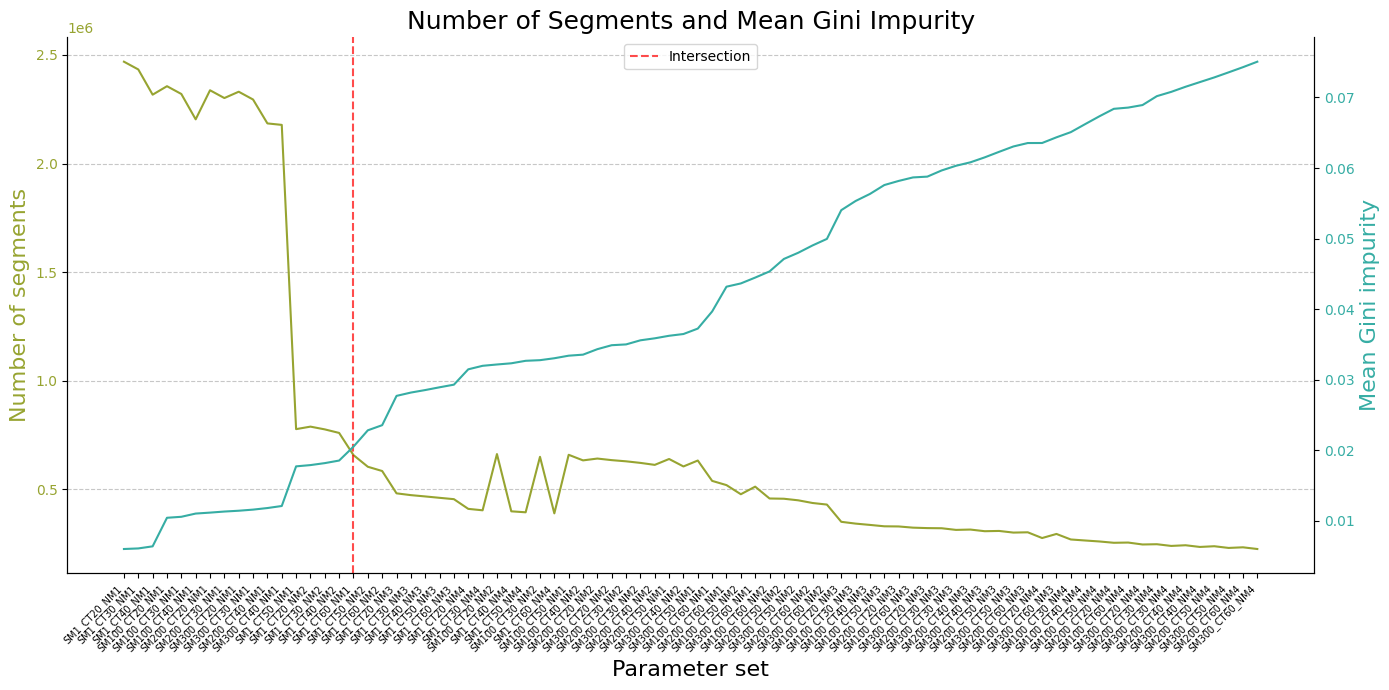

In [142]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot number_segments on the first y-axis
sns.lineplot(x="params", y="number_segments", data=df_sorted, color=sns.color_palette("husl", 4)[1], ax=ax1)
ax1.set_xlabel('Parameter set', fontdict={'size': 16})
ax1.set_ylabel('Number of segments', color=sns.color_palette("husl", 4)[1], fontdict={'size': 16})
ax1.tick_params(axis='y', labelcolor=sns.color_palette("husl", 4)[1])

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot impurity_mean on the second y-axis
sns.lineplot(x="params", y="impurity_mean", data=df_sorted, color=sns.color_palette("husl", 4)[2], ax=ax2)
ax2.set_ylabel('Mean Gini impurity', color=sns.color_palette("husl", 4)[2], fontdict={'size': 16})
ax2.tick_params(axis='y', labelcolor=sns.color_palette("husl", 4)[2])

# Remove top and right spines
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Set the title
ax1.set_title('Number of Segments and Mean Gini Impurity', fontdict={'size': 18})

# Set the size of the tick labels
ax1.tick_params(axis='x', labelsize=7)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Add grid
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# Find the parameter set where both lines intersect
intersection = np.argsort(np.abs(df_sorted["number_segments_normalized"] - df_sorted["impurity_mean_normalized"])).tolist()
ax1.axvline(x=intersection[0], color='r', linestyle='--', alpha=0.7, label='Intersection')

ax1.legend(loc='upper center')

plt.tight_layout()
plt.show()

In [144]:
df_sorted.iloc[intersection[0:15]]

,number_segments,number_segments_low_points5,number_segments_low_points10,impurity_mean,impurity_std,impurity_variance,impurity_ptp,impurity_2percentile,impurity_98percentile,std_multiplier,curvature_threshold,neighborhood_multiplier,params,percentage_number_segments_low_points5,percentage_number_segments_low_points10,number_segments_normalized,impurity_mean_normalized,number_segments_low_points5_normalized
44,658193,480536,551409,0.020523,0.090880,0.008259,0.7500,0.0,0.4444,1,60,1,SM1_CT60_NM1,73.008373,83.776187,0.192674,0.210067,0.202300
27,760290,508384,618152,0.018552,0.086034,0.007402,0.7359,0.0,0.4444,1,40,2,SM1_CT40_NM2,66.867116,81.304765,0.238191,0.181524,0.218099
9,776629,523032,633624,0.018187,0.085236,0.007265,0.7359,0.0,0.4444,1,30,2,SM1_CT30_NM2,67.346442,81.586446,0.245476,0.176246,0.226409
41,604586,404499,508772,0.022836,0.094881,0.009002,0.7359,0.0,0.4608,1,50,2,SM1_CT50_NM2,66.905122,84.152131,0.168774,0.243570,0.159162
40,777794,572938,675431,0.017728,0.085143,0.007249,0.7556,0.0,0.4444,1,50,1,SM1_CT50_NM1,73.661921,86.839317,0.245995,0.169603,0.254722
5,789306,535468,646262,0.017907,0.084614,0.007160,0.7359,0.0,0.4444,1,20,2,SM1_CT20_NM2,67.840356,81.877244,0.251128,0.172191,0.233465
45,585000,389570,492790,0.023564,0.096278,0.009269,0.7359,0.0,0.4688,1,60,2,SM1_CT60_NM2,66.593162,84.237607,0.160042,0.254118,0.150693
1,663004,423273,506513,0.032164,0.111879,0.012517,0.7769,0.0,0.4844,100,20,2,SM100_CT20_NM2,63.841696,76.396673,0.194819,0.378652,0.169813
30,650309,410827,493918,0.032775,0.112834,0.012731,0.7769,0.0,0.4861,100,30,2,SM100_CT30_NM2,63.174122,75.951279,0.189159,0.387505,0.162752
6,482248,315751,405212,0.027715,0.103076,0.010625,0.7448,0.0,0.4764,1,20,3,SM1_CT20_NM3,65.474818,84.025647,0.114233,0.314221,0.108813


## Refining the most appropriate parameter set

In [10]:
dir = Path("/DATA/Luis/thesis/scanline_classification/data/gini_impurity_fine/scanline_subsampling/gini_impurity_stats/gini_impurity_stats.csv")
df = pd.read_csv(dir)

df["number_segments_normalized"] = (df["number_segments"] - df["number_segments"].min()) / (df["number_segments"].max() - df["number_segments"].min())
df["impurity_mean_normalized"] = (df["impurity_mean"] - df["impurity_mean"].min()) / (df["impurity_mean"].max() - df["impurity_mean"].min())
df["number_segments_low_points5_normalized"] = (df["number_segments_low_points5"] - df["number_segments_low_points5"].min()) / (df["number_segments_low_points5"].max() - df["number_segments_low_points5"].min())

In [11]:
#df_sorted = df.sort_values(by="number_segments")
df_sorted = df.sort_values(by="impurity_mean")

/tmp/ipykernel_881067/964450105.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


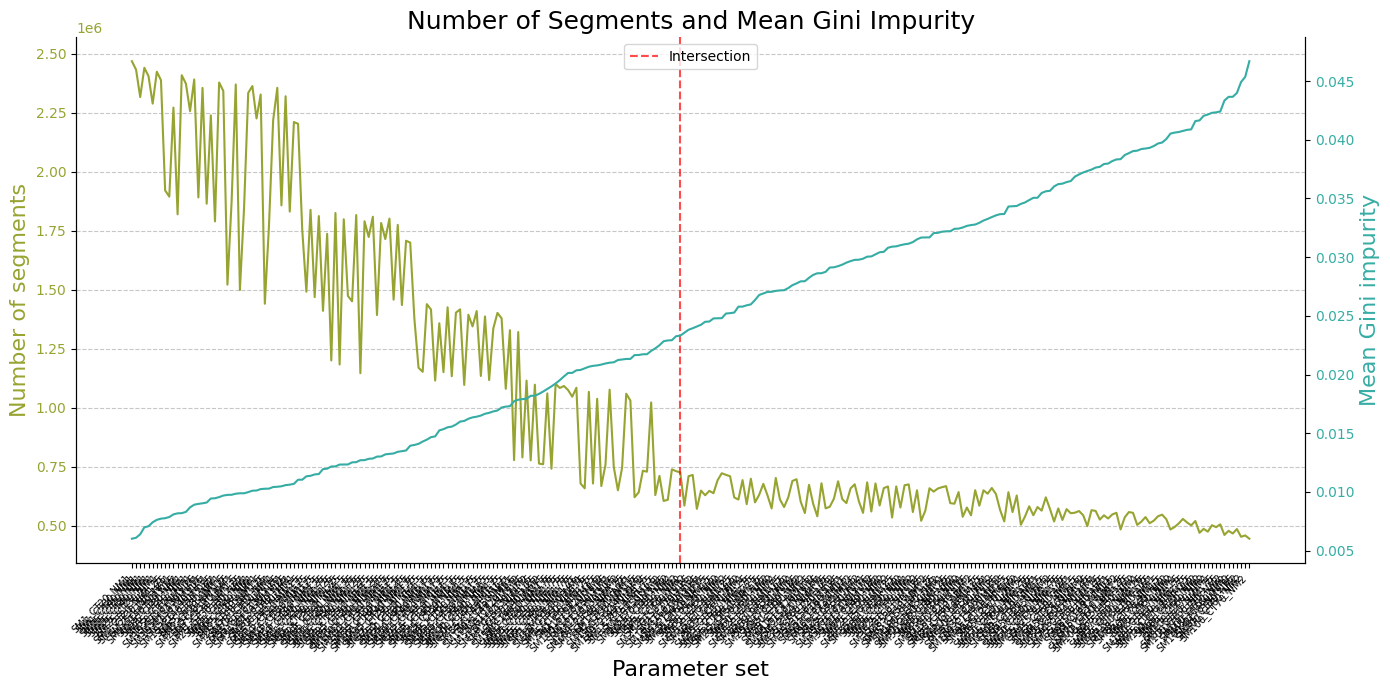

In [29]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot number_segments on the first y-axis
sns.lineplot(x="params", y="number_segments", data=df_sorted, color=sns.color_palette("husl", 4)[1], ax=ax1)
ax1.set_xlabel('Parameter set', fontdict={'size': 16})
ax1.set_ylabel('Number of segments', color=sns.color_palette("husl", 4)[1], fontdict={'size': 16})
ax1.tick_params(axis='y', labelcolor=sns.color_palette("husl", 4)[1])

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot impurity_mean on the second y-axis
sns.lineplot(x="params", y="impurity_mean", data=df_sorted, color=sns.color_palette("husl", 4)[2], ax=ax2)
ax2.set_ylabel('Mean Gini impurity', color=sns.color_palette("husl", 4)[2], fontdict={'size': 16})
ax2.tick_params(axis='y', labelcolor=sns.color_palette("husl", 4)[2])

# Remove top and right spines
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Set the title
ax1.set_title('Number of Segments and Mean Gini Impurity', fontdict={'size': 18})

# Set the size of the tick labels
ax1.tick_params(axis='x', labelsize=7)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Add grid
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# Find the parameter set where both lines intersect
intersection = np.argsort(np.abs(df_sorted["number_segments_normalized"] - df_sorted["impurity_mean_normalized"])).tolist()
ax1.axvline(x=intersection[62], color='r', linestyle='--', alpha=0.7, label='Intersection')

ax1.legend(loc='upper center')

plt.tight_layout()
plt.show()

In [30]:
df_sorted.iloc[intersection[62]]

number_segments                                   726052
number_segments_low_points5                       478201
number_segments_low_points10                      581743
impurity_mean                                    0.02331
impurity_std                                    0.096027
impurity_variance                               0.009221
impurity_ptp                                      0.7769
impurity_2percentile                                 0.0
impurity_98percentile                             0.4688
std_multiplier                                        25
curvature_threshold                                   30
neighborhood_multiplier                              2.0
params                                     SM25_CT30_NM2
percentage_number_segments_low_points5         65.863189
percentage_number_segments_low_points10        80.124151
number_segments_normalized                      0.139034
impurity_mean_normalized                        0.425216
number_segments_low_points5_nor